<a href="https://colab.research.google.com/github/LisavanEijk/PRA3024/blob/master/Week_2_PRA3024_Particle_Physics_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is my submission for the first graded assignment of PRA3024, the particle physics assignment of week 2. 
Made by: Lisa van Eijk
Course: PRA3024

In [1]:
# Installing neccessary packages to run the code. 
!pip install uproot awkward lz4 xxhash
!pip install lmfit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.4/328.4 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 583.2/583.2 KB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 KB 10.1 MB/s eta 0:00:00


This block imports all neccessary packages and imports the magnet down file from my drive.  

In [2]:
# Importing packages. 
import uproot
from numpy import *
import matplotlib.pyplot as plt
from lmfit.models import GaussianModel, ExponentialModel

# Importing MagnetUp file from my drive. This part should be changed depending on where you have saved the MagnetUp file. 
f=uproot.open("/content/drive/MyDrive/B2HHH_MagnetUp.root")
f.keys()


['DecayTree;1']

The following three blocks are copied from the link in the announcement, since they showed me how to see which variables are in the magnet down file, as well as how to access these variables. 

In [3]:
f["DecayTree"].show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
B_FlightDistance     | double                   | AsDtype('>f8')
B_VertexChi2         | double                   | AsDtype('>f8')
H1_PX                | double                   | AsDtype('>f8')
H1_PY                | double                   | AsDtype('>f8')
H1_PZ                | double                   | AsDtype('>f8')
H1_ProbK             | double                   | AsDtype('>f8')
H1_ProbPi            | double                   | AsDtype('>f8')
H1_Charge            | int32_t                  | AsDtype('>i4')
H1_IPChi2            | double                   | AsDtype('>f8')
H1_isMuon            | int32_t                  | AsDtype('>i4')
H2_PX                | double                   | AsDtype('>f8')
H2_PY                | double                   | AsDtype('>f8')
H2_PZ                | double                   | AsDtype(

In [4]:
f["DecayTree/H1_PX"].array()

<Array [1.04e+03, -318, -97.8, ..., 1.47e+03, 817] type='3420295 * float64'>

In [5]:

f["DecayTree/H1_PX"].array(library="np")

array([1038.63435383, -318.15769589,  -97.80224766, ...,  126.55972473,
       1469.84647106,  816.63465142])

**Why are we here?**

From here, my code for the exercises from the assignment can be found. 
The first block calculates the total momentum of daughter particle 1 (H1) and plots this as a histogram 

Text(0, 0.5, 'Events')

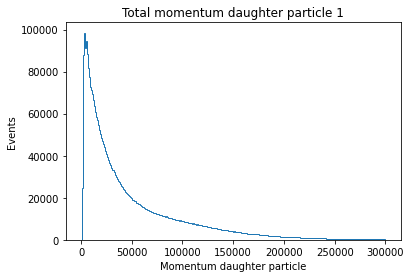

In [6]:
# Getting the momenta of daughter particle 1 in x, y and z direction from the decay tree and putting them in variables. 
H1_PX=f["DecayTree/H1_PX"].array(library="np")
H1_PY=f["DecayTree/H1_PY"].array(library="np")
H1_PZ=f["DecayTree/H1_PZ"].array(library="np")
# Calculating the total momentum of daughter particle 1. 
H1_Ptot=sqrt(H1_PX**2 + H1_PY**2 + H1_PZ**2)
# Plotting the total momentum of daughter particle 1 as a histogram. 
plt.hist(H1_Ptot, 300, (0,300000), histtype=u'step');
plt.title("Total momentum daughter particle 1")
plt.xlabel("Momentum daughter particle")
plt.ylabel("Events")


 This block plots the momentum of the mother particle (M_Ptot)

Text(0, 0.5, 'Events')

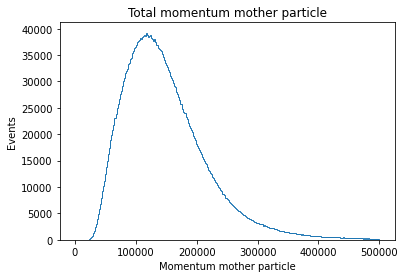

In [7]:
# Getting the momenta of daughter particles 2 and 3 as variables.
H2_PX = f["DecayTree/H2_PX"].array(library="np")
H3_PX = f["DecayTree/H3_PX"].array(library="np")
H2_PY = f["DecayTree/H2_PY"].array(library="np")
H3_PY = f["DecayTree/H3_PY"].array(library="np")
H2_PZ = f["DecayTree/H2_PZ"].array(library="np")
H3_PZ = f["DecayTree/H3_PZ"].array(library="np")
# Calculation the momentum of the mother particle.
M_Ptot = sqrt((H1_PX + H2_PX + H3_PX)**2 + (H1_PY + H2_PY + H3_PY)**2 + (H1_PZ + H2_PZ + H3_PZ)**2)
# Plotting the momentum of the mother particle.
plt.hist(M_Ptot, 300, (0,500000), histtype=u'step');
plt.title("Total momentum mother particle")
plt.xlabel("Momentum mother particle")
plt.ylabel("Events")

 This block plots the range of masses for the B-meson. 

Text(0, 0.5, 'Events')

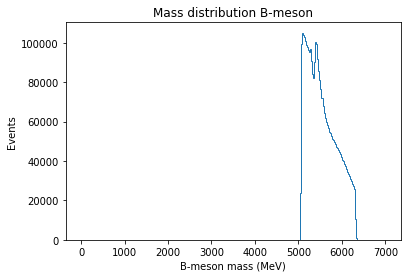

In [8]:
# Energies of daughter particles 1, 2 and 3, assuming the mass of each daughter particle is that of a Kaon: 497.61 MeV (in natural units)(Binas 6th edition, table 26C). 
# Calculating the energy of each daughter particle. 
E1 = sqrt(497.61**2 + (sqrt((H1_PX**2) + (H1_PY**2) + (H1_PZ**2)))**2)
E2 = sqrt(497.61**2 + (sqrt((H2_PX**2) + (H2_PY**2) + (H2_PZ**2)))**2)
E3 = sqrt(497.61**2 + (sqrt((H3_PX**2) + (H3_PY**2) + (H3_PZ**2)))**2)
# Calculating the energy of the B-meson (mother particle). 
Bmeson_E = E1 + E2 + E3
# Calculating the mass of the B-meson
Bmeson_M = sqrt(Bmeson_E**2 - M_Ptot**2)
# Plotting the mass of the B-meson
plt.hist(Bmeson_M, 300, (0,7000), histtype=u'step');
plt.title("Mass distribution B-meson")
plt.xlabel("B-meson mass (MeV)")
plt.ylabel("Events")
# The graph of the mass of the B-meson should ideally be a peak at 5279 MeV (Binas 6th edition, table 26C). However, the mass of the B-meson is very spread out, which it should not be. This is because also muons are taken into account in the calculation, while they should not be taken into account. 

The first two blocks plot the probability whether each daughter particle is a Kaon or Pion. The third block plots B_VertexChi2 for all particles. 

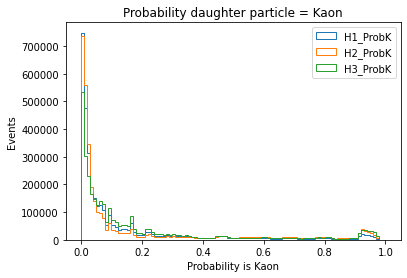

In [9]:
# Getting the probabilities as variables. 
H1_ProbK = f["DecayTree/H1_ProbK"].array(library="np")
H2_ProbK = f["DecayTree/H2_ProbK"].array(library="np")
H3_ProbK = f["DecayTree/H3_ProbK"].array(library="np")
H1_ProbPi = f["DecayTree/H1_ProbPi"].array(library="np")
H2_ProbPi = f["DecayTree/H2_ProbPi"].array(library="np")
H3_ProbPi = f["DecayTree/H3_ProbPi"].array(library="np")

# First block: Plotting the probability of each daughter particle being a Kaon (in one plot)
plt.hist(H1_ProbK, 100, (0,1), histtype=u'step');
plt.hist(H2_ProbK, 100, (0,1), histtype=u'step');
plt.hist(H3_ProbK, 100, (0,1), histtype=u'step');
plt.title("Probability daughter particle = Kaon")
plt.legend(['H1_ProbK', 'H2_ProbK', 'H3_ProbK'])
plt.xlabel("Probability is Kaon")
plt.ylabel("Events")
plt.show()


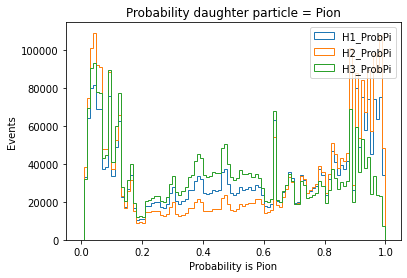

In [10]:
# Second block: Plotting the probability of each daughter particle being a Pion (in one plot)
plt.hist(H1_ProbPi, 100, (0,1), histtype=u'step');
plt.hist(H2_ProbPi, 100, (0,1), histtype=u'step');
plt.hist(H3_ProbPi, 100, (0,1), histtype=u'step');
plt.title("Probability daughter particle = Pion")
plt.legend(['H1_ProbPi', 'H2_ProbPi', 'H3_ProbPi'])
plt.xlabel("Probability is Pion")
plt.ylabel("Events")
plt.show()

Text(0, 0.5, 'Events')

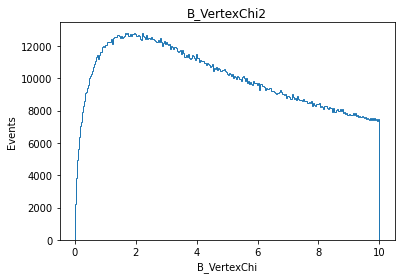

In [11]:
# Third block: Plotting B_VertexChi2
B_VertexChi2 = f["DecayTree/B_VertexChi2"].array(library="np")
plt.hist(B_VertexChi2, 300, (0,10), histtype=u'step');
plt.title("B_VertexChi2")
plt.xlabel("B_VertexChi")
plt.ylabel("Events")

This block makes the pre-selection and applies this to the new decay tree 'cut_tree'.  

In [12]:
# Since the B-meson should decay into three kaons, only events with a high probability of producing three kaons were taken into account. 
# Since no muons should be produced by the B-meson decay, any events producing muons were discarded. 
cut_tree = f["DecayTree"].arrays(cut = "(H1_ProbK>0.7) & (H2_ProbK>0.7) & (H3_ProbK>0.7) & (H1_isMuon == 0) & (H2_isMuon == 0) & (H3_isMuon == 0)", library = "np")
# Checking which keys are in the cut_tree, as well as their values, to see if the cut worked. 
dict(cut_tree)

# Source for making cuts to data in uproot: https://github.com/scikit-hep/uproot5/issues/194

{'B_FlightDistance': array([10.42814043, 16.53185828,  3.50934596, ..., 10.08601839,
         7.672519  ,  8.27370913]),
 'B_VertexChi2': array([ 4.05694746, 11.59338828,  5.73939931, ...,  2.4205464 ,
         2.18526257,  1.87422042]),
 'H1_PX': array([-4168.05553893,  1493.04861548,   123.87380699, ...,
          -66.22334065, -1052.43739084,  -354.0472858 ]),
 'H1_PY': array([ -704.95391892,  1944.60092468,   856.29045918, ...,
        -1333.01607027,  -520.18190938,   311.49559592]),
 'H1_PZ': array([24548.76657597, 33003.9153677 , 51956.56661619, ...,
        11125.03706788, 29524.78927704, 11389.85202561]),
 'H1_ProbK': array([0.77119875, 0.9535116 , 0.94048375, ..., 0.75686991, 0.94454801,
        0.7964499 ]),
 'H1_ProbPi': array([0.0517258 , 0.1047684 , 0.07822052, ..., 0.06692886, 0.10303029,
        0.06177372]),
 'H1_Charge': array([-1, -1, -1, ..., -1,  1,  1], dtype=int32),
 'H1_IPChi2': array([1002.65707543, 1731.92356333,    7.00589361, ...,  692.97852224,
         266

This block plots the B-meson mass calculated via the uncut DecayTree and the B-meson mass calculated via the cut_tree. 

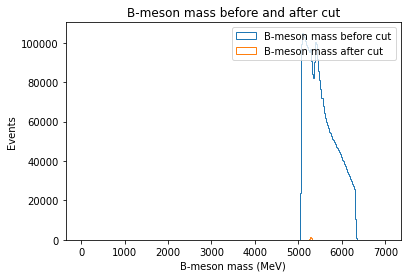

In [13]:
# Getting the variables from the cut_tree.
H1_PX_cut = cut_tree['H1_PX']
H1_PY_cut = cut_tree['H1_PY']
H1_PZ_cut = cut_tree['H1_PZ']
H2_PX_cut = cut_tree['H2_PX']
H2_PY_cut = cut_tree['H2_PY']
H2_PZ_cut = cut_tree['H2_PZ']
H3_PX_cut = cut_tree['H3_PX']
H3_PY_cut = cut_tree['H3_PY']
H3_PZ_cut = cut_tree['H3_PZ']
# Energies of daughter particles 1, 2 and 3 after cut.
E1_cut = sqrt(497.61**2 + (sqrt((H1_PX_cut**2) + (H1_PY_cut**2) + (H1_PZ_cut**2)))**2)
E2_cut = sqrt(497.61**2 + (sqrt((H2_PX_cut**2) + (H2_PY_cut**2) + (H2_PZ_cut**2)))**2)
E3_cut = sqrt(497.61**2 + (sqrt((H3_PX_cut**2) + (H3_PY_cut**2) + (H3_PZ_cut**2)))**2)
# Energy of the B-meson after cut.
Bmeson_E_cut = E1_cut + E2_cut + E3_cut
# Mass of B-meson after cut.
M_Ptot_cut = sqrt((H1_PX_cut + H2_PX_cut + H3_PX_cut)**2 + (H1_PY_cut + H2_PY_cut + H3_PY_cut)**2 + (H1_PZ_cut + H2_PZ_cut + H3_PZ_cut)**2)
Bmeson_M_cut = sqrt(Bmeson_E_cut**2 - M_Ptot_cut**2)
# Plotting mass B-meson. This was already calculated before. 
plt.hist(Bmeson_M, 300, (0,7000), histtype=u'step');
# Plotting mass B-meson after cut. 
plt.hist(Bmeson_M_cut, 300, (0,7000), histtype=u'step');
# Setting up legend, title and combining the plots. 
plt.title("B-meson mass before and after cut")
plt.legend(['B-meson mass before cut', 'B-meson mass after cut'])
plt.xlabel("B-meson mass (MeV)")
plt.ylabel("Events")
plt.show()
# This new peak is much more reasonable, since the mass of the B-meson should be around 5279 MeV (Binas 6th edition, table 26C) and it appears to be around that value on the histogram x-axis. 

Text(0, 0.5, 'Events')

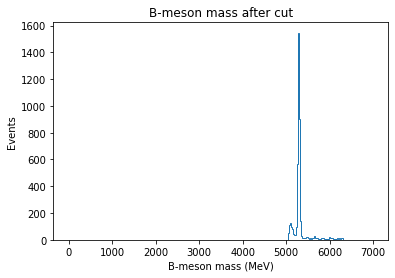

In [14]:
# Since the graph after the cut is not very clearly visible in this combined histogram, the individual graph after the cut is shown again below. 
plt.hist(Bmeson_M_cut, 300, (0,7000), histtype=u'step');
plt.title("B-meson mass after cut")
plt.xlabel("B-meson mass (MeV)")
plt.ylabel("Events")

**How do we count the number of events?**


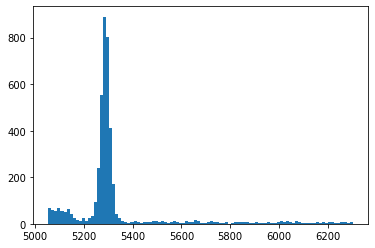

In [83]:
# Getting x and y data from histogram
ydata, xdata, unimportant = plt.hist(Bmeson_M_cut, 100)

# Defining the gaussian model.  
# Sources: https://lmfit.github.io/lmfit-py/builtin_models.html#gaussianmodel
# https://stackoverflow.com/questions/50371428/scipy-curve-fit-raises-optimizewarning-covariance-of-the-parameters-could-not
gaus_mod = GaussianModel(independent_vars=['x'], prefix = 'gaus_')
model = gaus_mod
# Setting initial values for the parameters of the gaussian model. 
params = model.make_params(gaus_amplitude = 1600, gaus_center = 5300, gaus_sigma = 3.0)
# Since there is one more x data point than y data points, the last x data point is discarded. 
corr_xdata = xdata[:-1]
# Fitting the model to the data to create the signal curve. 
gausFit = model.fit(ydata, params, x=corr_xdata)


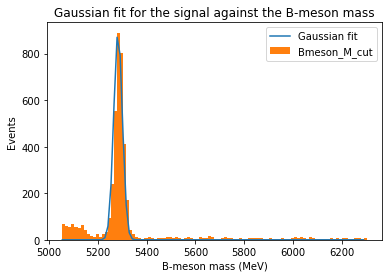

In [84]:
# Plotting the signal fit against the Bmeson_M_cut graph
plt.plot(corr_xdata, gausFit.best_fit)
plt.hist(Bmeson_M_cut, 100);
plt.title("Gaussian fit for the signal against the B-meson mass")
plt.legend(['Gaussian fit', 'Bmeson_M_cut'])
plt.xlabel("B-meson mass (MeV)")
plt.ylabel("Events")
plt.show()

In [85]:
# Gaussian fit report. This report includes the normalisation component (gaus_amplitude), the error (presented to the right of gaus_amplitude, indicated with +/- in front) and the chi-square. 
print(gausFit.fit_report())

[[Model]]
    Model(gaussian, prefix='gaus_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 48
    # data points      = 100
    # variables        = 3
    chi-square         = 39606.6536
    reduced chi-square = 408.316016
    Akaike info crit   = 604.158222
    Bayesian info crit = 611.973732
    R-squared          = 0.97861849
[[Variables]]
    gaus_amplitude:  39653.5607 +/- 693.490000 (1.75%) (init = 1600)
    gaus_center:     5282.54284 +/- 0.35809153 (0.01%) (init = 5300)
    gaus_sigma:      17.7322697 +/- 0.35809178 (2.02%) (init = 3)
    gaus_fwhm:       41.7563034 +/- 0.84324168 (2.02%) == '2.3548200*gaus_sigma'
    gaus_height:     892.129601 +/- 15.6022633 (1.75%) == '0.3989423*gaus_amplitude/max(1e-15, gaus_sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(gaus_amplitude, gaus_sigma) = 0.577


In [86]:
# Defining the exponential model. 
exp_mod = ExponentialModel(independent_vars=['x'], prefix = 'exp_', nan_policy='raise')
model2 = exp_mod
# Setting initial values for the parameters of the exponential model. . 
params2 = model2.make_params(exp_amplitude = 100, exp_decay = 350)
# Fitting the model to the data to create the noise curve. . 
expFit = model2.fit(ydata, params2, x=corr_xdata)


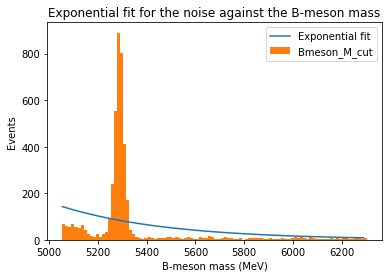

In [87]:
# Plotting the noise fit against the Bmeson_M_cut graph. 
plt.plot(corr_xdata, expFit.best_fit)
plt.hist(Bmeson_M_cut, 100)
plt.title("Exponential fit for the noise against the B-meson mass")
plt.legend(['Exponential fit', 'Bmeson_M_cut'])
plt.xlabel("B-meson mass (MeV)")
plt.ylabel("Events")
plt.show()

In [88]:
print(expFit.fit_report())

[[Model]]
    Model(exponential, prefix='exp_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 161
    # data points      = 100
    # variables        = 2
    chi-square         = 1674454.49
    reduced chi-square = 17086.2703
    Akaike info crit   = 976.582781
    Bayesian info crit = 981.793121
    R-squared          = 0.09605172
[[Variables]]
    exp_amplitude:  14661446.2 +/- 81015736.7 (552.58%) (init = 100)
    exp_decay:      438.016387 +/- 200.011165 (45.66%) (init = 350)
[[Correlations]] (unreported correlations are < 0.100)
    C(exp_amplitude, exp_decay) = -0.999


Text(0, 0.5, 'Events')

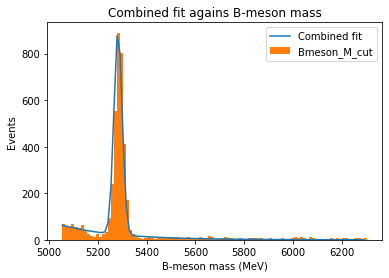

In [89]:
# Combining the two fits. 
model3 = gaus_mod + exp_mod 
params3 = model3.make_params(gaus_amplitude = 1600, gaus_center = 5300, gaus_sigma = 3.0, exp_amplitude = 100, exp_decay = 350)
completeFit = model3.fit(ydata, params3, x=corr_xdata)
# Plotting the combined fit against the B-meson mass. 
plt.plot(corr_xdata, completeFit.best_fit)
plt.hist(Bmeson_M_cut, 100)
plt.title("Combined fit agains B-meson mass")
plt.legend(['Combined fit', 'Bmeson_M_cut'])
plt.xlabel("B-meson mass (MeV)")
plt.ylabel("Events")

In [90]:
print(completeFit.fit_report())

[[Model]]
    (Model(gaussian, prefix='gaus_') + Model(exponential, prefix='exp_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 820
    # data points      = 100
    # variables        = 5
    chi-square         = 6241.67650
    reduced chi-square = 65.7018578
    Akaike info crit   = 423.383391
    Bayesian info crit = 436.409242
    R-squared          = 0.99663045
[[Variables]]
    gaus_amplitude:  37483.1217 +/- 308.189284 (0.82%) (init = 1600)
    gaus_center:     5282.64671 +/- 0.14311043 (0.00%) (init = 5300)
    gaus_sigma:      17.0291027 +/- 0.14939533 (0.88%) (init = 3)
    gaus_fwhm:       40.1004716 +/- 0.35179911 (0.88%) == '2.3548200*gaus_sigma'
    gaus_height:     878.120420 +/- 6.48744287 (0.74%) == '0.3989423*gaus_amplitude/max(1e-15, gaus_sigma)'
    exp_amplitude:   4.6161e+11 +/- 9.6233e+11 (208.47%) (init = 100)
    exp_decay:       222.477480 +/- 20.0669167 (9.02%) (init = 350)
[[Correlations]] (unreported correlations are < 0.100)

Since the normalisation component of this gaussian distribution is the gaus_amplitude (https://lmfit.github.io/lmfit-py/builtin_models.html#gaussianmodel), the number of events is equal to the gaus_amplitude: so the number of events is equal to 37483, with an error of +/- 308, as can be seen in the gaussian fit report above. The result of the chi-square test is 6241, as shown in the gaussian fit report. 

**Counting**

B+ -> K+, K+, K-    
B- -> K-, K-, K+

In [31]:
# Defining B+ and B-
selection_Neg = "(H1_ProbK>0.7) & (H2_ProbK>0.7) & (H3_ProbK>0.7) & (H1_isMuon == 0) & (H2_isMuon == 0) & (H3_isMuon == 0) & ((H1_Charge + H2_Charge + H3_Charge) == -1)"
selection_Pos = "(H1_ProbK>0.7) & (H2_ProbK>0.7) & (H3_ProbK>0.7) & (H1_isMuon == 0) & (H2_isMuon == 0) & (H3_isMuon == 0) & ((H1_Charge + H2_Charge + H3_Charge) == 1)"
BNeg_cut_tree = f["DecayTree"].arrays(cut = selection_Neg, library = "np")
BPos_cut_tree = f["DecayTree"].arrays(cut = selection_Pos, library = "np")


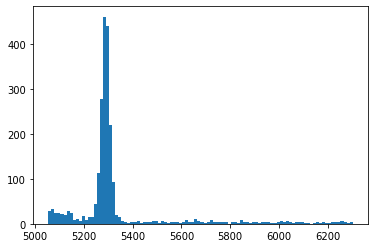

In [91]:
# Getting the variables from the new cut trees and applying them to get the mass of the B+ 
H1_PX_Pos = BPos_cut_tree['H1_PX']
H1_PY_Pos = BPos_cut_tree['H1_PY']
H1_PZ_Pos = BPos_cut_tree['H1_PZ']
H2_PX_Pos = BPos_cut_tree['H2_PX']
H2_PY_Pos = BPos_cut_tree['H2_PY']
H2_PZ_Pos = BPos_cut_tree['H2_PZ']
H3_PX_Pos = BPos_cut_tree['H3_PX']
H3_PY_Pos = BPos_cut_tree['H3_PY']
H3_PZ_Pos = BPos_cut_tree['H3_PZ']
# Calculating the energies of the daughter particles and combining them to find the energy of the B+
E1_Pos = sqrt(497.61**2 + (sqrt((H1_PX_Pos**2) + (H1_PY_Pos**2) + (H1_PZ_Pos**2)))**2)
E2_Pos = sqrt(497.61**2 + (sqrt((H2_PX_Pos**2) + (H2_PY_Pos**2) + (H2_PZ_Pos**2)))**2)
E3_Pos = sqrt(497.61**2 + (sqrt((H3_PX_Pos**2) + (H3_PY_Pos**2) + (H3_PZ_Pos**2)))**2)

BPos_E = E1_Pos + E2_Pos + E3_Pos
# Calculating B+ mass and plotting it
Ptot_Pos = sqrt((H1_PX_Pos + H2_PX_Pos + H3_PX_Pos)**2 + (H1_PY_Pos + H2_PY_Pos + H3_PY_Pos)**2 + (H1_PZ_Pos + H2_PZ_Pos + H3_PZ_Pos)**2)
BPos_M = sqrt(BPos_E**2 - Ptot_Pos**2)
# Plotting mass B+
plt.hist(BPos_M, 100);

Text(0, 0.5, 'Events')

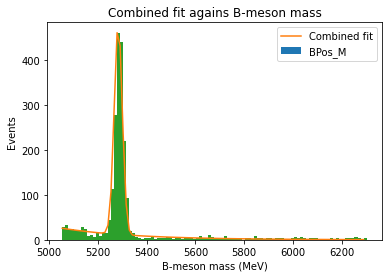

In [92]:
# Fitting the B+ mass. 
# Getting x and y data from histogram
Pos_ydata, Pos_xdata, unimportant_2 = plt.hist(BPos_M, 100)
# Since there is one more x data point than y data points, the last x data point is discarded. 
corr_2_xdata = Pos_xdata[:-1]
# Setting initial values for the parameters. 
paramsPos = model3.make_params(gaus_amplitude = 1550, gaus_center = 5300, gaus_sigma = 3.0, exp_amplitude = 130, exp_decay = 350)
# The model for fitting the mass was already defined earlier. Since the fit for this data should be similar to the fit for the B-meson mass before (gaussian signal + exponential noise), the same model will be used. 
# The only changes are the data (that of the B+) and different parameters. 
completeFit_2 = model3.fit(Pos_ydata, paramsPos, x=corr_2_xdata)
# Plotting the fit against the data. 
plt.plot(corr_2_xdata, completeFit_2.best_fit)
plt.hist(BPos_M, 100)
plt.title("Combined fit agains B-meson mass")
plt.legend(['Combined fit', 'BPos_M'])
plt.xlabel("B-meson mass (MeV)")
plt.ylabel("Events")

In [93]:
# Getting the fit report. From here, the number of events (gaus_amplitude) can be read. 
print(completeFit_2.fit_report())


[[Model]]
    (Model(gaussian, prefix='gaus_') + Model(exponential, prefix='exp_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 551
    # data points      = 100
    # variables        = 5
    chi-square         = 1834.79916
    reduced chi-square = 19.3136754
    Akaike info crit   = 300.952012
    Bayesian info crit = 313.977863
    R-squared          = 0.99640963
[[Variables]]
    gaus_amplitude:  19455.2310 +/- 159.514879 (0.82%) (init = 1550)
    gaus_center:     5283.38896 +/- 0.14415498 (0.00%) (init = 5300)
    gaus_sigma:      16.6205893 +/- 0.14858892 (0.89%) (init = 3)
    gaus_fwhm:       39.1384961 +/- 0.34990015 (0.89%) == '2.3548200*gaus_sigma'
    gaus_height:     466.981913 +/- 3.54282322 (0.76%) == '0.3989423*gaus_amplitude/max(1e-15, gaus_sigma)'
    exp_amplitude:   4.9815e+08 +/- 8.5679e+08 (171.99%) (init = 130)
    exp_decay:       301.127520 +/- 30.0938355 (9.99%) (init = 350)
[[Correlations]] (unreported correlations are < 0.100)

Thus, the number of events creating a B+ is 19455. 

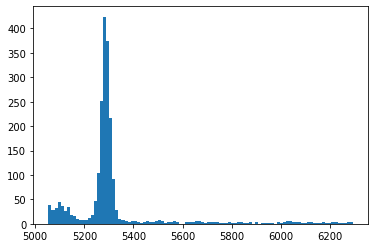

In [95]:
# Getting the variables from the new cut trees and applying them to get the mass of the B-
H1_PX_Neg = BNeg_cut_tree['H1_PX']
H1_PY_Neg = BNeg_cut_tree['H1_PY']
H1_PZ_Neg = BNeg_cut_tree['H1_PZ']
H2_PX_Neg = BNeg_cut_tree['H2_PX']
H2_PY_Neg = BNeg_cut_tree['H2_PY']
H2_PZ_Neg = BNeg_cut_tree['H2_PZ']
H3_PX_Neg = BNeg_cut_tree['H3_PX']
H3_PY_Neg = BNeg_cut_tree['H3_PY']
H3_PZ_Neg = BNeg_cut_tree['H3_PZ']
# Calculating the energies of the daughter particles and combining them to find the energy of the B-
E1_Neg = sqrt(497.61**2 + (sqrt((H1_PX_Neg**2) + (H1_PY_Neg**2) + (H1_PZ_Neg**2)))**2)
E2_Neg = sqrt(497.61**2 + (sqrt((H2_PX_Neg**2) + (H2_PY_Neg**2) + (H2_PZ_Neg**2)))**2)
E3_Neg = sqrt(497.61**2 + (sqrt((H3_PX_Neg**2) + (H3_PY_Neg**2) + (H3_PZ_Neg**2)))**2)

BNeg_E = E1_Neg + E2_Neg + E3_Neg
# Calculating B- mass and plotting it
Ptot_Neg = sqrt((H1_PX_Neg + H2_PX_Neg + H3_PX_Neg)**2 + (H1_PY_Neg + H2_PY_Neg + H3_PY_Neg)**2 + (H1_PZ_Neg + H2_PZ_Neg + H3_PZ_Neg)**2)
BNeg_M = sqrt(BNeg_E**2 - Ptot_Neg**2)
# Plotting mass B-
plt.hist(BNeg_M, 100);

Text(0, 0.5, 'Events')

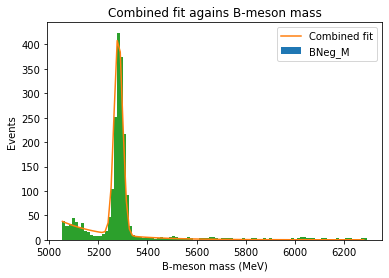

In [105]:
# Fitting the B- mass. 
# This is almost the same as the fitting for the B+ mass. The only difference is the data and parameters used. 
# Getting x and y data from histogram
Neg_ydata, Neg_xdata, unimportant_3 = plt.hist(BNeg_M, 100)
# Since there is one more x data point than y data points, the last x data point is discarded. 
corr_3_xdata = Neg_xdata[:-1]
# The following parameters would need new initial values, but since the selection did not work and I can thus not see the new graph of the B+ mass, I do not know which initial values to choose. 
# Thus, the initial values for the B-meson mass are kept for now. 
paramsNeg = model3.make_params(gaus_amplitude = 20000, gaus_center = 5300, gaus_sigma = 3.0, exp_amplitude = 160, exp_decay = 350)
# The model for fitting the mass was already defined earlier. Since the fit for this data should be similar to the fit for the B-meson mass before (gaussian signal + exponential noise), the same model will be used. 
# The only changes are the data (that of the B+) and different parameters. 
completeFit_3 = model3.fit(Neg_ydata, paramsNeg, x=corr_3_xdata)
# Plotting the fit against the data. 
plt.plot(corr_3_xdata, completeFit_3.best_fit)
plt.hist(BNeg_M, 100)
plt.title("Combined fit agains B-meson mass")
plt.legend(['Combined fit', 'BNeg_M'])
plt.xlabel("B-meson mass (MeV)")
plt.ylabel("Events")

In [106]:
# Getting the fit report. From here, the number of events (gaus_amplitude) can be read. 
print(completeFit_3.fit_report())

[[Model]]
    (Model(gaussian, prefix='gaus_') + Model(exponential, prefix='exp_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 962
    # data points      = 100
    # variables        = 5
    chi-square         = 2100.32273
    reduced chi-square = 22.1086603
    Akaike info crit   = 314.467611
    Bayesian info crit = 327.493462
    R-squared          = 0.99499042
[[Variables]]
    gaus_amplitude:  17887.4780 +/- 186.081184 (1.04%) (init = 20000)
    gaus_center:     5281.63613 +/- 0.17697597 (0.00%) (init = 5300)
    gaus_sigma:      17.2753243 +/- 0.18744201 (1.09%) (init = 3)
    gaus_fwhm:       40.6802792 +/- 0.44139219 (1.09%) == '2.3548200*gaus_sigma'
    gaus_height:     413.078879 +/- 3.74173946 (0.91%) == '0.3989423*gaus_amplitude/max(1e-15, gaus_sigma)'
    exp_amplitude:   2.0223e+14 +/- 6.1997e+14 (306.56%) (init = 160)
    exp_decay:       172.414405 +/- 17.8262862 (10.34%) (init = 350)
[[Correlations]] (unreported correlations are < 0.10

Thus, the number of events creating a B- is 17887. 

In [108]:
# Calculating the assymetry. 
# Putting the number of events creating a B+ and the number creating the B- in variables. These were calculated in the previous fit reports. 
N_BPos = 19455 
N_BNeg = 17887
A = (N_BNeg - N_BPos)/(N_BNeg + N_BPos)
print(A)

-0.041990252262867546


Thus, the assymetry is -0.042. 

In [110]:
sigma = sqrt((1 - A**2)/(N_BNeg + N_BPos))
print(sigma)

0.00517032692463472


Thus, the uncertainty of this assymetry is 0.0052. 